In [77]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from datetime import date

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

%matplotlib inline

## 1. Populate Dataframes

In [78]:
# read from csv files
 
topicsDF = pd.read_csv(r'topics.csv',encoding='latin-1')

wf_twitterDF = pd.read_csv(r'twitter_wf_textblob - manual_update.csv',encoding='latin-1')
sap_twitterDF = pd.read_csv(r'twitter_sap_textblob - manual_update.csv',encoding='latin-1')

In [79]:
# Total number for each company
print("WF Tweets: "+ str(wf_twitterDF.size))

print("SAP Tweets: "+ str(sap_twitterDF.size))

WF Tweets: 11388
SAP Tweets: 13624


In [80]:
wf_twitterDF['sourceDate'] = wf_twitterDF['sourceDate'].astype('datetime64[ns]') 

In [81]:
wf_twitterDF.reset_index(drop=True)
wf_twitterDF.set_index('sourceDate')


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,lang,isRelated,source,NP,isInReplyTo,user_id,vader_compound,vader_sentiment,tb_polarity,tb_sentiment
sourceDate,,,,,,,,,,,,,,,,,,,,,
2019-09-29,213,255,255,5dae74f611bb5a25b06906f2,The Board of \nhas TOTALLY lost it.\nNew CEO w...,https://t.co/gqW2h4NW9T,9/29/2019 17:17,0,0,0,...,en,Y,WF,N,0,2.135718e+07,-0.7663,N,-0.128409,E
2019-09-28,154,189,189,5dae74ce11bb5a25b06906b0,Wells Fargo new CEO is just as Evil as the las...,NaN,9/28/2019 16:10,0,0,0,...,en,Y,WF,N,0,1.853485e+07,-0.6776,N,-0.287879,E
2019-09-27,45,49,49,5dab73cd11bb5a1f6c86dfee,Wells Fargo names outsider as new CEO three ye...,https://t.co/TZWr8e5raO,9/27/2019 22:35,0,0,0,...,en,Y,WF,NaN,0,1.125933e+08,-0.6124,N,-0.181818,E
2019-09-27,0,0,0,5dab73ca11bb5a1f6c86dfbd,Wells Fargo names outsider as new CEO three ye...,https://t.co/WBtIAtX8Gf,9/27/2019 23:51,2,0,0,...,en,Y,WF,NaN,0,4.867858e+09,-0.6124,N,-0.181818,E
2019-09-28,175,211,211,5dae74d011bb5a25b06906c6,Wells Fargo names outsider as new CEO three ye...,https://t.co/VOnrw8hF8R,9/28/2019 14:20,0,0,0,...,en,Y,WF,NaN,0,3.067629e+08,-0.6124,N,-0.181818,E
2019-10-01,360,426,426,5dae756511bb5a25b069079d,So Wells Fargo chose a rent-a-ceo rather than ...,https://t.co/awCUgOdz2G,10/1/2019 21:30,0,0,0,...,en,Y,WF,N,0,9.490000e+17,-0.5434,N,0.000000,E
2019-09-30,291,348,348,5dae751911bb5a25b069074f,WELLS FARGO NOMBRA NUEVO CEO PARA ENMENDAR CRI...,NaN,9/30/2019 18:48,0,0,0,...,es,Y,WF,NaN,0,3.724730e+08,-0.4767,E,0.000000,E
2019-10-01,396,474,474,5dae756811bb5a25b06907cd,WELLS FARGO NOMBRA NUEVO CEO PARA ENMENDAR CRI...,NaN,10/1/2019 10:49,0,0,0,...,es,Y,WF,NaN,0,4.277073e+09,-0.4767,E,0.000000,E
2019-10-01,413,491,491,5dae756a11bb5a25b06907de,WELLS FARGO NOMBRA NUEVO CEO PARA ENMENDAR CRI...,NaN,10/1/2019 1:30,0,0,0,...,es,Y,WF,NaN,0,3.229112e+09,-0.4767,E,0.000000,E


In [82]:
sap_twitterDF['sourceDate'] = sap_twitterDF['sourceDate'].astype('datetime64[ns]') 

In [83]:
sap_twitterDF.reset_index(drop=True)
sap_twitterDF.set_index('sourceDate')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,lang,isRelated,source,NP,isInReplyTo,user_id,vader_compound,vader_sentiment,tb_polarity,tb_sentiment
sourceDate,,,,,,,,,,,,,,,,,,,,,
2019-10-09,0,619,619,5dae77e811bb5a25b069085e,"Experience Management: ""Start with empathy for...",NaN,2019-10-09 18:10:03,0,0,0,...,en,Y,SAP,NaN,0.0,2.593419e+08,0.0000,E,0.000000,E
2019-10-09,1,621,621,5dae77e811bb5a25b0690860,"Experience Management: ""Start with empathy for...",https://t.co/t0MxMZ5DxI,2019-10-09 18:00:01,0,0,2,...,en,Y,SAP,NaN,0.0,3.266873e+08,0.0000,E,0.000000,E
2019-10-09,2,633,633,5dae77e911bb5a25b069086c,SAP CEO has made clear: the new economy is he...,https://t.co/tqPgEZix2U,2019-10-09 14:36:00,0,0,0,...,en,Y,SAP,NaN,0.0,1.105129e+08,0.1027,E,0.078788,E
2019-10-09,3,643,643,5dae77e911bb5a25b0690876,Thanks for hosting Bill Mcdermott CEO of SAP ...,NaN,2019-10-09 05:21:42,0,0,0,...,en,Y,SAP,NaN,0.0,1.024890e+18,0.7184,P,0.200000,E
2019-10-10,4,645,645,5dae784011bb5a25b0690878,"New article: ""SAP CEO Bill McDermott stepping ...",https://t.co/DoQvIY7sVy,2019-10-10 23:58:48,0,0,0,...,en,Y,SAP,NaN,0.0,7.297547e+17,0.0000,E,-0.006397,E
2019-10-10,5,646,646,5dae784011bb5a25b0690879,Breaking News: CEO Bill McDermott Resigns; Mo...,https://t.co/9hqI0mTsGm,2019-10-10 23:58:38,0,0,5,...,en,Y,SAP,NaN,0.0,1.463898e+07,-0.3182,E,0.000000,E
2019-10-10,6,647,647,5dae784011bb5a25b069087a,Sad but happy to offer a sincere thank you to ...,https://t.co/tpOtGChF5q,2019-10-10 23:58:27,0,0,0,...,en,Y,SAP,P,0.0,3.951284e+09,0.8957,P,0.425000,E
2019-10-10,7,648,648,5dae784111bb5a25b069087b,SAP said CEO Bill McDermott wouldnÃÂ¢ÃÂÃÂ...,NaN,2019-10-10 23:58:19,0,0,0,...,en,Y,SAP,NaN,0.0,3.772019e+08,0.0000,E,0.000000,E
2019-10-10,8,649,649,5dae784111bb5a25b069087c,Bill McDermott steps down as SAPÃÂ¢ÃÂÃÂs ...,https://t.co/herfof3ldl,2019-10-10 23:58:13,0,0,0,...,en,Y,SAP,NaN,0.0,2.708690e+08,0.0000,E,-0.155556,E


In [84]:
# Weight the vader compound and tb_polarity data by quote, reply and retweet count. 

wf_twitterDF['vader_weighted'] = wf_twitterDF.apply(lambda row: row.vader_compound * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 
wf_twitterDF['tb_weighted'] = wf_twitterDF.apply(lambda row: row.tb_polarity * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 


In [85]:

# Weight the vader compound and tb_polarity data by quote, reply and retweet count. 

sap_twitterDF['vader_weighted'] = sap_twitterDF.apply(lambda row: row.vader_compound * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 
sap_twitterDF['tb_weighted'] = sap_twitterDF.apply(lambda row: row.tb_polarity * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 

### 1.2 Join with Stock price

In [86]:
# read from csv files
 
WF_stock = pd.read_csv(r'./Stock_Price/wFC_limited.csv',encoding='latin-1')
WF_stock['Date'] = WF_stock['Date'].astype('datetime64[ns]') 

WF_stock.reset_index(drop=True)
WF_stock.set_index('Date') 

WF_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-25,48.730000,49.540001,48.650002,49.259998,48.793034,21313100
1,2019-09-26,49.250000,49.369999,48.820000,48.869999,48.406731,19984000
2,2019-09-27,50.400002,51.410000,50.250000,50.709999,50.229290,59467400
3,2019-09-30,50.770000,50.849998,50.060001,50.439999,49.961849,26897100
4,2019-10-01,50.650002,50.779999,49.000000,49.060001,48.594933,27249300


In [87]:
# add Close price difference column
WF_stock['Close_diff']= WF_stock['Close'].diff()
# set first row to 0
WF_stock.Close_diff.iloc[0]  = 0

WF_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_diff
0,2019-09-25,48.730000,49.540001,48.650002,49.259998,48.793034,21313100,0.000000
1,2019-09-26,49.250000,49.369999,48.820000,48.869999,48.406731,19984000,-0.389999
2,2019-09-27,50.400002,51.410000,50.250000,50.709999,50.229290,59467400,1.840000
3,2019-09-30,50.770000,50.849998,50.060001,50.439999,49.961849,26897100,-0.270000
4,2019-10-01,50.650002,50.779999,49.000000,49.060001,48.594933,27249300,-1.379998


In [88]:
SAP_stock = pd.read_csv(r'./Stock_Price/SAP_limited.csv',encoding='latin-1')
SAP_stock['Date'] = SAP_stock['Date'].astype('datetime64[ns]') 

SAP_stock.reset_index(drop=True)
SAP_stock.set_index('Date') 

SAP_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600
1,2019-10-10,114.959999,116.160004,114.559998,115.250000,115.250000,1062100
2,2019-10-11,125.720001,127.900002,125.470001,126.199997,126.199997,2234300
3,2019-10-14,125.940002,126.559998,125.739998,126.050003,126.050003,877700
4,2019-10-15,125.830002,127.889999,125.470001,127.180000,127.180000,830900


In [89]:
# add Close price difference column
SAP_stock['Close_diff']= SAP_stock['Close'].diff()
# set first row to 0
SAP_stock.Close_diff.iloc[0]  = 0

SAP_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_diff
0,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,0.000000
1,2019-10-10,114.959999,116.160004,114.559998,115.250000,115.250000,1062100,-0.800003
2,2019-10-11,125.720001,127.900002,125.470001,126.199997,126.199997,2234300,10.949997
3,2019-10-14,125.940002,126.559998,125.739998,126.050003,126.050003,877700,-0.149994
4,2019-10-15,125.830002,127.889999,125.470001,127.180000,127.180000,830900,1.129997


In [90]:
# join tables by sourceDate and Date
result = pd.merge(wf_twitterDF, WF_stock, left_on='sourceDate', right_on='Date') # how='right', 
wf_twitterDF = result 

In [91]:
# join tables by sourceDate and Date
result = pd.merge(sap_twitterDF, SAP_stock, left_on='sourceDate', right_on='Date') # how='right', 
sap_twitterDF = result 

In [92]:
sap_twitterDF.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,vader_weighted,tb_weighted,Date,Open,High,Low,Close,Adj Close,Volume,Close_diff
0,0,619,619,5dae77e811bb5a25b069085e,"Experience Management: ""Start with empathy for...",NaN,2019-10-09 18:10:03,0,0,0,...,0.0000,0.000000,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,0.000000
1,1,621,621,5dae77e811bb5a25b0690860,"Experience Management: ""Start with empathy for...",https://t.co/t0MxMZ5DxI,2019-10-09 18:00:01,0,0,2,...,0.0000,0.000000,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,0.000000
2,2,633,633,5dae77e911bb5a25b069086c,SAP CEO has made clear: the new economy is he...,https://t.co/tqPgEZix2U,2019-10-09 14:36:00,0,0,0,...,0.1027,0.078788,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,0.000000
3,3,643,643,5dae77e911bb5a25b0690876,Thanks for hosting Bill Mcdermott CEO of SAP ...,NaN,2019-10-09 05:21:42,0,0,0,...,1.4368,0.400000,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,0.000000
4,4,645,645,5dae784011bb5a25b0690878,"New article: ""SAP CEO Bill McDermott stepping ...",https://t.co/DoQvIY7sVy,2019-10-10 23:58:48,0,0,0,...,0.0000,-0.012795,2019-10-10,114.959999,116.160004,114.559998,115.250000,115.250000,1062100,-0.800003


### 1.5 Bootstrap data - 500 samples per day

In [93]:
def bootstrap_replicate(data, num_samples, rand_state):
    return resample(data, replace=True, n_samples=num_samples, random_state=rand_state)

number_of_samples =500
rand_state=5

# WF

source_date = '2019-09-25'
wf_vader_0925 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-09-26'
wf_vader_0926 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-09-27'
wf_vader_0927 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

#source_date = '2019-09-28'
#wf_vader_0928 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

#source_date = '2019-09-29'
#wf_vader_0929 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-09-30'
wf_vader_0930 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-01'
wf_vader_1001 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-02'
wf_vader_1002 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

#wf_t_master_df= pd.concat([wf_vader_0925, wf_vader_0926, wf_vader_0927, wf_vader_0928, wf_vader_0929, wf_vader_0930, wf_vader_1001, wf_vader_1002], ignore_index=True)
wf_t_master_df= pd.concat([wf_vader_0925, wf_vader_0926, wf_vader_0927, wf_vader_0930, wf_vader_1001, wf_vader_1002], ignore_index=True)

In [94]:
wf_t_master_df.reset_index(drop=True)
wf_t_master_df.set_index('sourceDate') 
wf_t_master_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,vader_weighted,tb_weighted,Date,Open,High,Low,Close,Adj Close,Volume,Close_diff
0,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,-0.1027,0.25,2019-09-25,48.73,49.540001,48.650002,49.259998,48.793034,21313100,0.0
1,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,-0.1027,0.25,2019-09-25,48.73,49.540001,48.650002,49.259998,48.793034,21313100,0.0
2,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,-0.1027,0.25,2019-09-25,48.73,49.540001,48.650002,49.259998,48.793034,21313100,0.0
3,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,-0.1027,0.25,2019-09-25,48.73,49.540001,48.650002,49.259998,48.793034,21313100,0.0
4,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,-0.1027,0.25,2019-09-25,48.73,49.540001,48.650002,49.259998,48.793034,21313100,0.0


In [95]:
# SAP
# 10/09/19 - 10/16/19

source_date = '2019-10-09'
sap_vader_1009 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-10'
sap_vader_1010 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-11'
sap_vader_1011 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

#source_date = '2019-10-12'
#sap_vader_1012 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

#source_date = '2019-10-13'
#sap_vader_1013 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-14'
sap_vader_1014 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-15'
sap_vader_1015 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-16'
sap_vader_1016 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

#sap_t_master_df= pd.concat([sap_vader_1009, sap_vader_1010, sap_vader_1011, sap_vader_1012, sap_vader_1013, sap_vader_1014, sap_vader_1015, sap_vader_1016], ignore_index=True)
sap_t_master_df= pd.concat([sap_vader_1009, sap_vader_1010, sap_vader_1011, sap_vader_1014, sap_vader_1015, sap_vader_1016], ignore_index=True)

In [96]:
sap_t_master_df.reset_index(drop=True)
sap_t_master_df.set_index('sourceDate') 
sap_t_master_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,vader_weighted,tb_weighted,Date,Open,High,Low,Close,Adj Close,Volume,Close_diff
0,3,643,643,5dae77e911bb5a25b0690876,Thanks for hosting Bill Mcdermott CEO of SAP ...,NaN,2019-10-09 05:21:42,0,0,0,...,1.4368,0.400000,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,0.0
1,2,633,633,5dae77e911bb5a25b069086c,SAP CEO has made clear: the new economy is he...,https://t.co/tqPgEZix2U,2019-10-09 14:36:00,0,0,0,...,0.1027,0.078788,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,0.0
2,3,643,643,5dae77e911bb5a25b0690876,Thanks for hosting Bill Mcdermott CEO of SAP ...,NaN,2019-10-09 05:21:42,0,0,0,...,1.4368,0.400000,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,0.0
3,1,621,621,5dae77e811bb5a25b0690860,"Experience Management: ""Start with empathy for...",https://t.co/t0MxMZ5DxI,2019-10-09 18:00:01,0,0,2,...,0.0000,0.000000,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,0.0
4,2,633,633,5dae77e911bb5a25b069086c,SAP CEO has made clear: the new economy is he...,https://t.co/tqPgEZix2U,2019-10-09 14:36:00,0,0,0,...,0.1027,0.078788,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,0.0


## 4. WF - Compare between dates

### 4.1. Vader Compound

### 4.1.4 Ordinary Least squares linear regression - with resampling

In [97]:
wf_t_master_df.Close_diff.describe()

count    3000.000000
mean       -0.131666
std         0.979881
min        -1.379998
25%        -0.590000
50%        -0.329999
75%         0.000000
max         1.840000
Name: Close_diff, dtype: float64

In [98]:
xlim_max = wf_t_master_df.sourceDate.max() + timedelta(days=2)
xlim_min = wf_t_master_df.sourceDate.min() - timedelta(days=2)

Intercept from library: 0.14682771887550283
Slope from library: -0.18566259036144553


C:\Users\yulmee\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


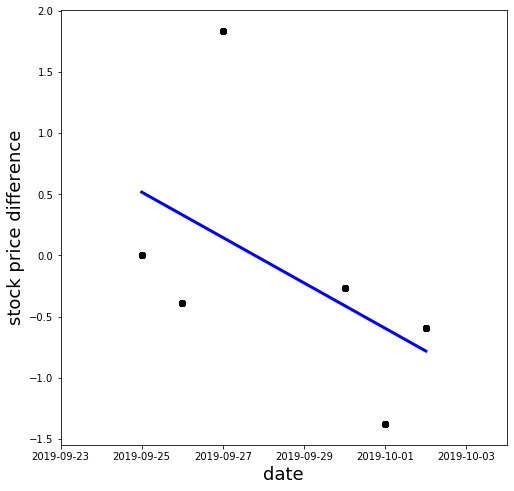

In [99]:
wf_t_master_df['Intercept'] = 1
# Create the features and response
X = wf_t_master_df.loc[:, ['Intercept', 'sourceDate','vader_weighted']]
y = wf_t_master_df.loc[:, 'Close_diff'] # YMJ: Close Price difference from day to day. 

wf_announced_date = datetime(2019, 9, 27,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - wf_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_vader_intercept = linear_regression.intercept_
wf_vader_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('stock price difference', size = 18); 
plt.xlim([xlim_min, xlim_max]) 

plt.show()

#### 4.1.5. Bayesian Linear regression - with resampling

In [100]:
# Using all observations (use mu=-0.13 and sd=0.98 from dataframe statistics for stock close price difference)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = -0.13, sd = 0.98)
    
    # Slope 
    slope = pm.Normal('slope', mu = -0.13, sd = 0.98)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd =0.98)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS(max_treedepth=12)#target_accept=0.90, 

    # Posterior distribution
    linear_trace = pm.sample(1000, step)
    


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:05<00:00, 519.78draws/s]


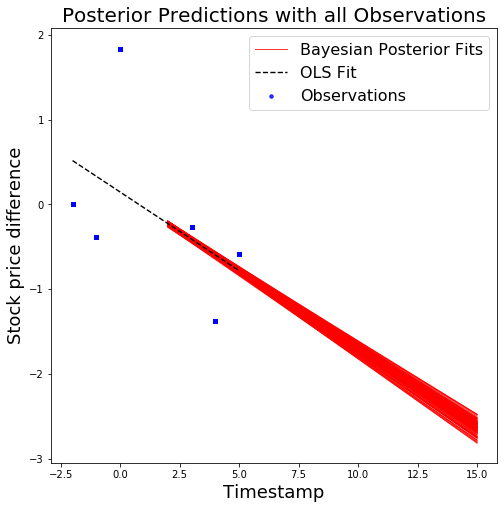

In [101]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 15, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], wf_vader_intercept + X['Timestamp'] * wf_vader_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('Stock price difference', size = 18);
plt.legend(prop={'size': 16});

#### 4.1.6 Predict 10/3 stock price

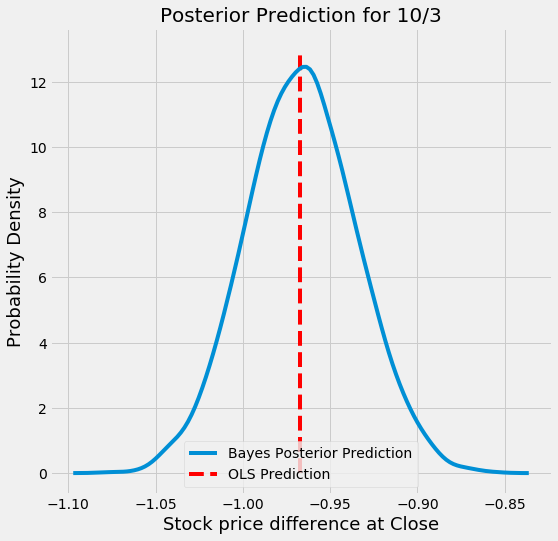

In [103]:
timestamp_10_3 =6 
wf_bayes_prediction_v = linear_trace['Intercept'] + linear_trace['slope'] * timestamp_10_3 
plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot(wf_bayes_prediction_v, label = 'Bayes Posterior Prediction')
plt.vlines(x = wf_vader_intercept + wf_vader_slope * timestamp_10_3, 
           ymin = 0, ymax = 13, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('Stock price difference at Close', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 10/3', size = 20);

### 4.2. TB Polarity

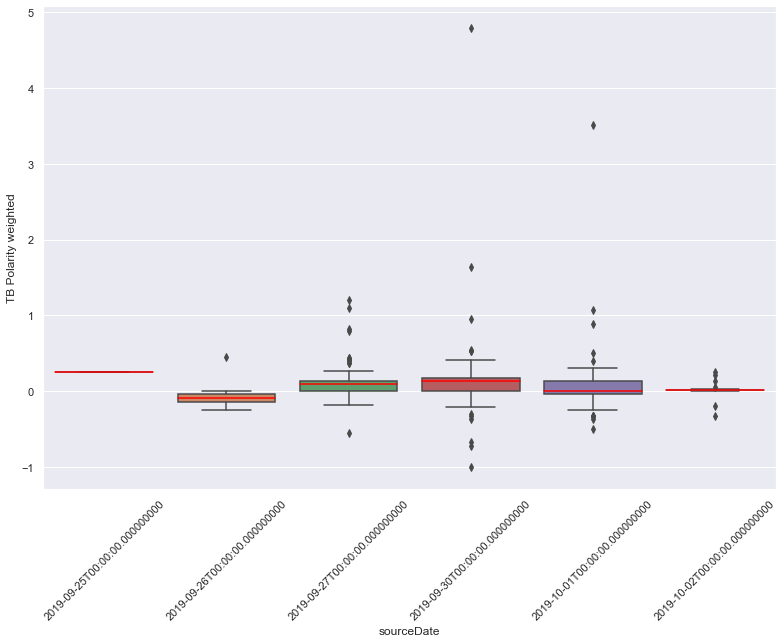

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create box plot with Seaborn's default settings
g=sns.boxplot(x='sourceDate', y='tb_weighted', data=wf_twitterDF,  medianprops={'color':'red'}) #, showfliers=False)


# Label the axes
g=plt.xlabel('sourceDate')
g=plt.ylabel('TB Polarity weighted')  

plt.xticks(rotation=45)
# Show the plot
plt.show()


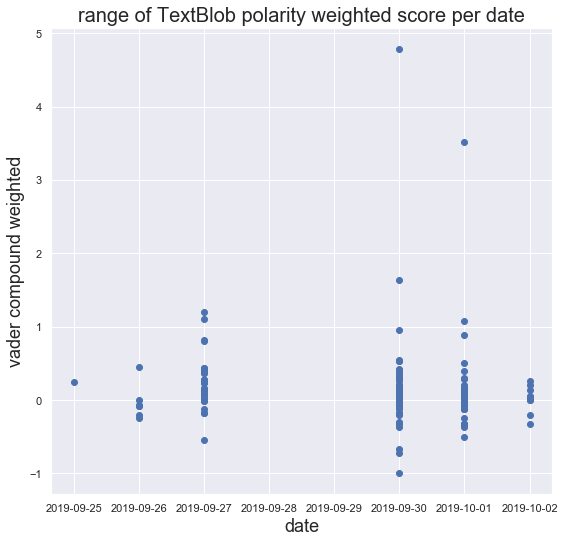

In [26]:
plt.figure(figsize=(8, 8))

plt.plot(wf_twitterDF['sourceDate'], wf_twitterDF['tb_weighted'], 'bo');
plt.xlabel('date', size = 18); plt.ylabel('vader compound weighted', size = 18); 
plt.title('range of TextBlob polarity weighted score per date', size = 20);

### 4.2.4 Ordinary Least squares linear regression - with resampling

In [104]:
wf_t_master_df.Close_diff.describe()

count    3000.000000
mean       -0.131666
std         0.979881
min        -1.379998
25%        -0.590000
50%        -0.329999
75%         0.000000
max         1.840000
Name: Close_diff, dtype: float64

Intercept from library: 0.14682771887550283
Slope from library: -0.18566259036144553


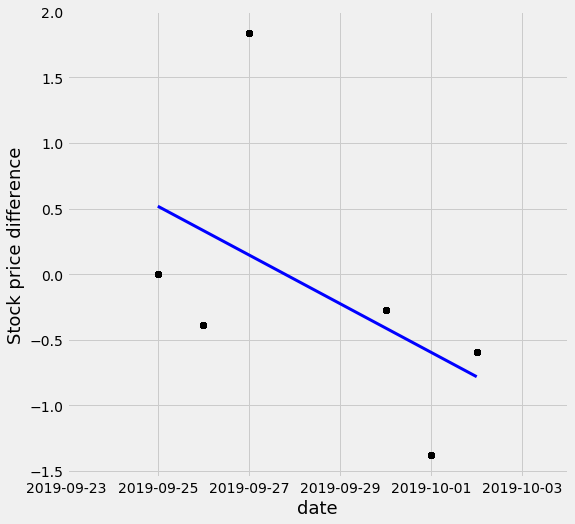

In [105]:
wf_t_master_df['Intercept'] = 1
# Create the features and response
X = wf_t_master_df.loc[:, ['Intercept', 'sourceDate','tb_weighted']]
y = wf_t_master_df.loc[:, 'Close_diff']

wf_announced_date = datetime(2019, 9, 27,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - wf_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_tb_intercept = linear_regression.intercept_
wf_tb_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('Stock price difference', size = 18); 
plt.xlim([xlim_min, xlim_max]) 

plt.show()

### 4.2.5. Bayesian Linear regression - with resampling

In [106]:
# Using all observations (use mu = -0.13, sd = 0.98 from dataframe statistics for stock price difference)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = -0.13, sd = 00.82)
    
    # Slope 
    slope = pm.Normal('slope', mu = -0.13, sd = 0.98)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 0.98)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS(max_treedepth=12)

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:05<00:00, 561.62draws/s]


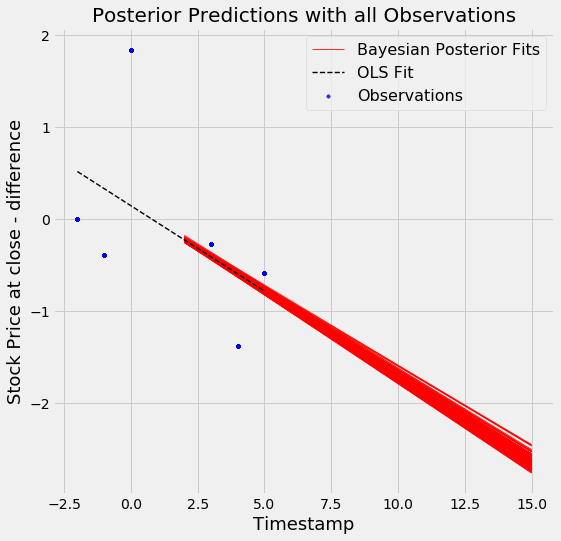

In [107]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 15, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], wf_tb_intercept + X['Timestamp'] * wf_tb_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('Stock Price at close - difference', size = 18);
plt.legend(prop={'size': 16});

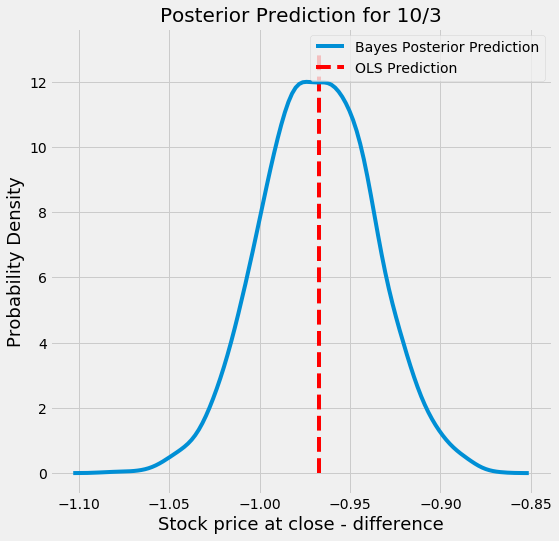

In [109]:
wf_bayes_prediction_tb = linear_trace['Intercept'] + linear_trace['slope'] * timestamp_10_3 

plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot(wf_bayes_prediction_tb, label = 'Bayes Posterior Prediction')
plt.vlines(x = wf_tb_intercept + wf_tb_slope * timestamp_10_3, 
           ymin = 0, ymax = 13, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('Stock price at close - difference', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 10/3', size = 20);

## 5. SAP - Compare between dates

### 5.1. Vader Compound

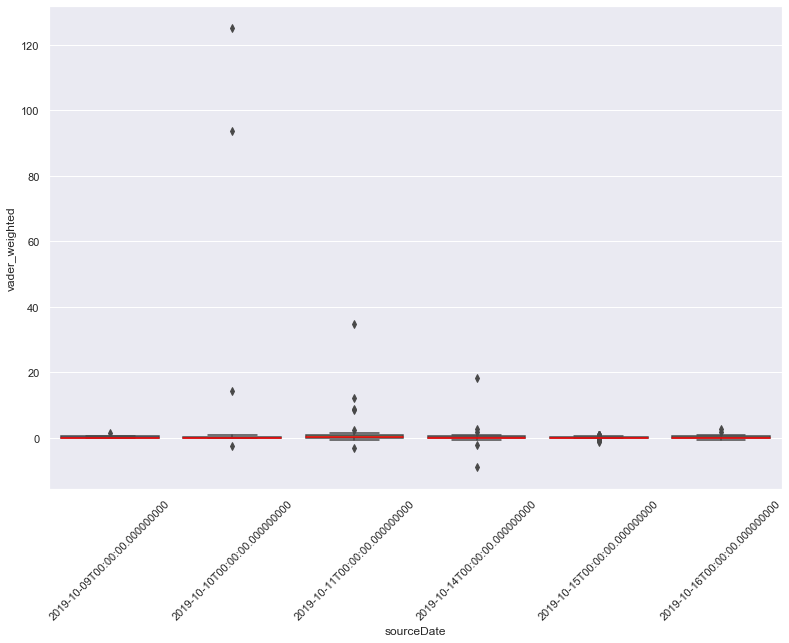

In [110]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create box plot with Seaborn's default settings
g=sns.boxplot(x='sourceDate', y='vader_weighted', data=sap_twitterDF, medianprops={'color':'red'})


# Label the axes
g=plt.xlabel('sourceDate')
g=plt.ylabel('vader_weighted')  

plt.xticks(rotation=45)
# Show the plot
plt.show()

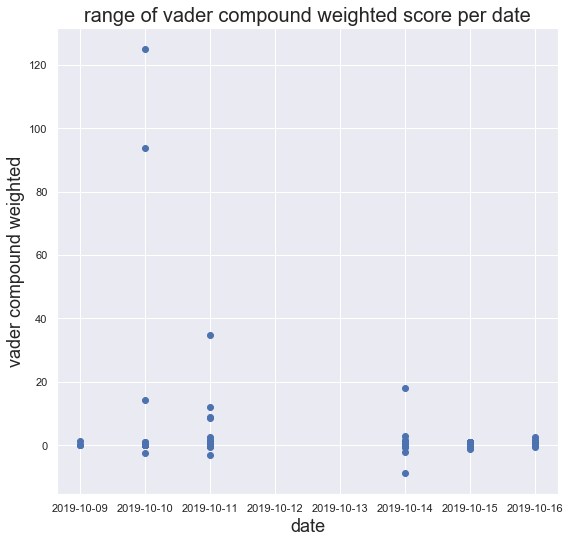

In [111]:
plt.figure(figsize=(8, 8))

plt.plot(sap_twitterDF['sourceDate'], sap_twitterDF['vader_weighted'], 'bo');
plt.xlabel('date', size = 18); plt.ylabel('vader compound weighted', size = 18); 
plt.title('range of vader compound weighted score per date', size = 20);

In [112]:
sap_twitterDF['Close_diff'].describe()

count    359.000000
mean       2.995848
std        4.841505
min       -0.800003
25%       -0.800003
50%        1.129997
75%       10.949997
max       10.949997
Name: Close_diff, dtype: float64

### 5.1.3 Ordinary Least squares linear regression - with resampling

In [113]:
xlim_max_sap = sap_t_master_df.sourceDate.max() + timedelta(days=2)
xlim_min_sap = sap_t_master_df.sourceDate.min() - timedelta(days=2)

In [115]:
sap_t_master_df.Close_diff.describe()

count    3000.000000
mean        2.111666
std         4.030945
min        -0.800003
25%        -0.149994
50%         0.564999
75%         1.540001
max        10.949997
Name: Close_diff, dtype: float64

Intercept from library: 2.499315911646584
Slope from library: -0.15505983132530057


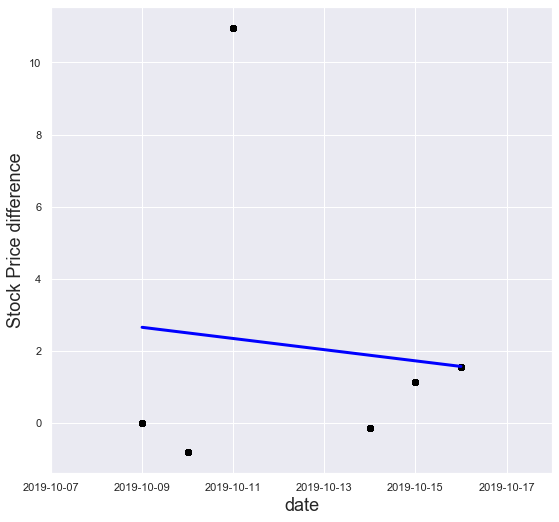

In [116]:
sap_t_master_df['Intercept'] = 1
# Create the features and response
X = sap_t_master_df.loc[:, ['Intercept', 'sourceDate','vader_weighted']]
y = sap_t_master_df.loc[:, 'Close_diff']

sap_announced_date = datetime(2019, 10, 10,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - sap_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
sap_vader_intercept = linear_regression.intercept_
sap_vader_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('Stock Price difference', size = 18); 
plt.xlim([xlim_min_sap, xlim_max_sap]) 

plt.show()

### 5.1.4. Bayesian Linear regression - with resampling

In [117]:
# Using all observations (use mu= 123.24 and sd=5.44 from dataframe statistics for vader compound score)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 2.11, sd = 4.03)
    
    # Slope 
    slope = pm.Normal('slope', mu = 2.11, sd = 4.03)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 4.03)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:05<00:00, 547.48draws/s]
The acceptance probability does not match the target. It is 0.8808775560712506, but should be close to 0.8. Try to increase the number of tuning steps.


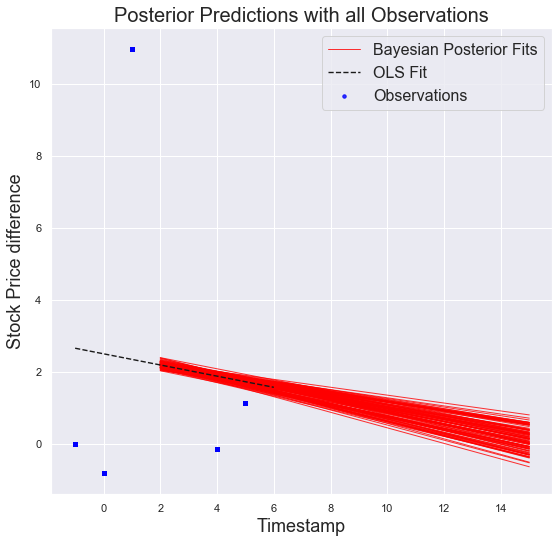

In [118]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 15, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], sap_vader_intercept + X['Timestamp'] * sap_vader_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('Stock Price difference', size = 18);
plt.legend(prop={'size': 16});

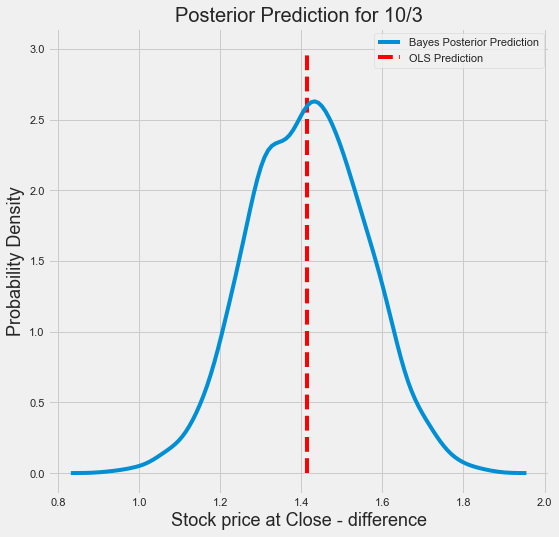

In [130]:
timestamp_10_17 = 7
sap_bayes_prediction_v = linear_trace['Intercept'] + linear_trace['slope'] * timestamp_10_17 
plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot(sap_bayes_prediction_v, label = 'Bayes Posterior Prediction')
plt.vlines(x = sap_vader_intercept + sap_vader_slope * timestamp_10_17, 
           ymin = 0, ymax = 3, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('Stock price at Close - difference', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 10/3', size = 20);

### 5.2. TextBlob Polarity

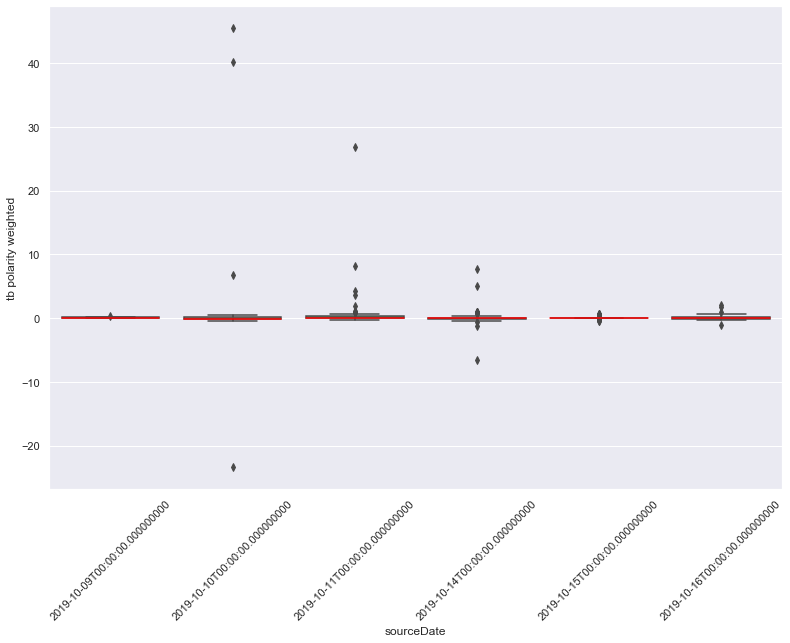

In [121]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create box plot with Seaborn's default settings
g=sns.boxplot(x='sourceDate', y='tb_weighted', data=sap_twitterDF, medianprops={'color':'red'})


# Label the axes
g=plt.xlabel('sourceDate')
g=plt.ylabel('tb polarity weighted')  

plt.xticks(rotation=45)
# Show the plot
plt.show()

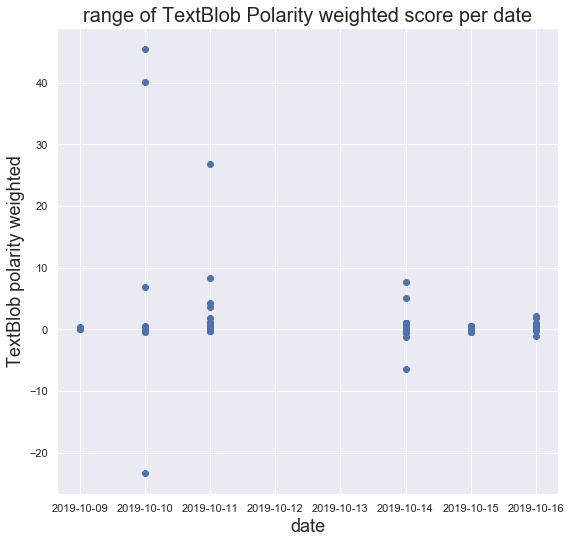

In [122]:
plt.figure(figsize=(8, 8))

plt.plot(sap_twitterDF['sourceDate'], sap_twitterDF['tb_weighted'], 'bo');
plt.xlabel('date', size = 18); plt.ylabel('TextBlob polarity weighted', size = 18); 
plt.title('range of TextBlob Polarity weighted score per date', size = 20);

### 5.2.4 Ordinary Least squares linear regression - with resampling

In [123]:
sap_t_master_df.Close_diff.describe()

count    3000.000000
mean        2.111666
std         4.030945
min        -0.800003
25%        -0.149994
50%         0.564999
75%         1.540001
max        10.949997
Name: Close_diff, dtype: float64

Intercept from library: 2.499315911646584
Slope from library: -0.15505983132530057


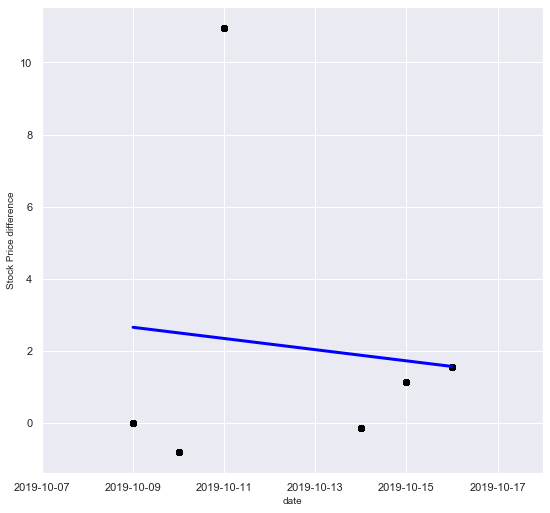

In [124]:
sap_t_master_df['Intercept'] = 1
# Create the features and response
X = sap_t_master_df.loc[:, ['Intercept', 'sourceDate','tb_weighted']]
y = sap_t_master_df.loc[:, 'Close_diff']

sap_announced_date = datetime(2019, 10, 10,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - sap_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
sap_tb_intercept = linear_regression.intercept_
sap_tb_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 10); plt.ylabel('Stock Price difference', size = 10); 
plt.xlim([xlim_min_sap, xlim_max_sap]) 

plt.show()

### 4.2.5. Bayesian Linear regression - with resampling

In [125]:
# Using all observations (use mu =123.24, sd = 5.44 from dataframe statistics for tb polarity score)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 2.11, sd = 4.03)
    
    # Slope 
    slope = pm.Normal('slope', mu = 2.11, sd = 4.03)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 4.03)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:05<00:00, 569.34draws/s]


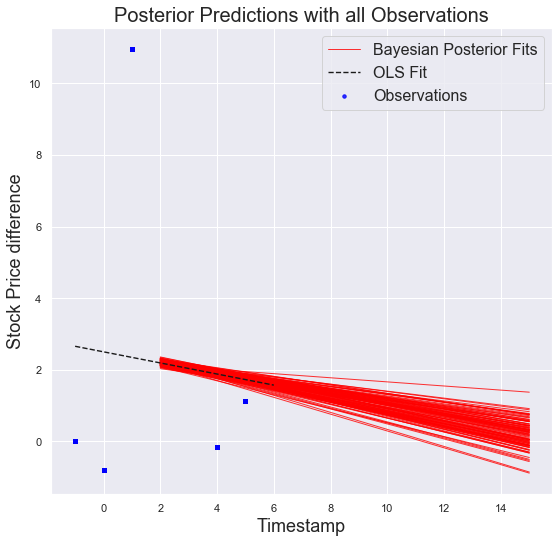

In [127]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 15, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], sap_tb_intercept + X['Timestamp'] * sap_tb_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('Stock Price difference', size = 18);
plt.legend(prop={'size': 16});

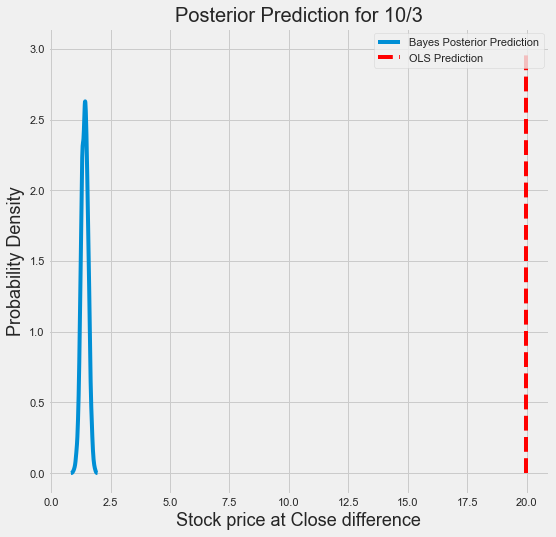

In [129]:
timestamp_10_17 = 7
sap_bayes_prediction_tb = linear_trace['Intercept'] + linear_trace['slope'] * timestamp_10_17 
plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot(sap_bayes_prediction_tb, label = 'Bayes Posterior Prediction')
plt.vlines(x = sap_tb_intercept + sap_tb_intercept * timestamp_10_17, 
           ymin = 0, ymax = 3, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('Stock price at Close difference', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 10/3', size = 20);